In [ ]:
# Common imports
# uso local
#jupyter notebook --NotebookApp.allow_origin='https://colab.research.google.com' --port=9090 --no-browser
import os
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, roc_auc_score, classification_report
import seaborn as sns
sns.set(color_codes=True)
import matplotlib.pyplot as plt
%matplotlib inline

from numpy.random import seed
import tensorflow as tf

import tensorflow as tf
from tensorflow import keras

from keras.layers import Input, Dropout
from keras.layers.core import Dense 
from keras.models import Model, Sequential, load_model
from keras import regularizers
from keras.models import model_from_json

In [ ]:
# !pip install pyod            # normal install
# !pip install --upgrade pyod  # or update if needed
# generate data 
import numpy as np
import pandas as pd
from pyod.models.knn import KNN
from pyod.models.auto_encoder import AutoEncoder
from pyod.utils.data import generate_data


contamination = 0.05  # percentage of outliers
n_train = 1000  # number of training points
n_test = 500  # number of testing points
n_features = 2 # Number of features


X_train, X_test, y_train,  y_test = \
    generate_data(n_train=n_train,
                  n_test=n_test,
                  n_features=n_features,
                  contamination=contamination,
                  random_state=42,
                  offset = 5 )
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)
y_train= pd.DataFrame(y_train)
y_test= pd.DataFrame(y_test)


# # usando apenas os dados normais 
a = int( n_train * (1-contamination))
X_train = X_train[:a]

# X_train.to_csv(f'{n_features}X_train_features_{n_features}.csv', sep=',', index=False)
# X_test.to_csv(f'{n_features}X_test_features_{n_features}.csv', sep=',', index=False)
# # y_train.to_csv(f'{n_features}y_train_features_{n_features}.csv', sep=',', index=False)
# y_test.to_csv(f'{n_features}y_test_features_{n_features}.csv', sep=',', index=False)

In [ ]:
# X_train = X_train.iloc[np.random.permutation(X_train.index)].reset_index(drop=True)
# X_train.iloc[:, :-1].plot(legend=None, title='Random Original Dimension Data')

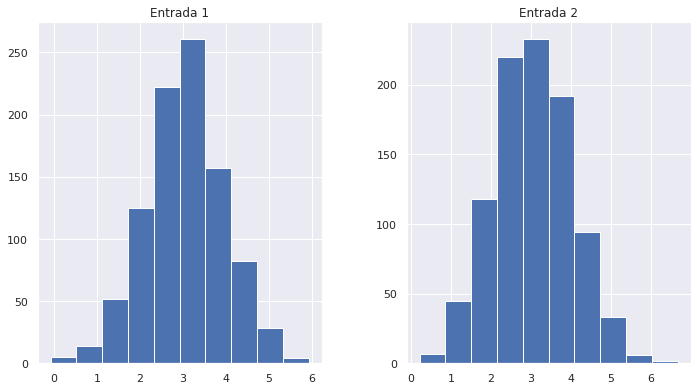

In [ ]:
a = X_train.rename(columns = {0:'Entrada 1', 1:'Entrada 2', 2:'Entrada 3'}, inplace = True)
X_train.hist()
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(11.7, 6.27)
fig.savefig(f'X_train_hist{n_features}.pdf') 

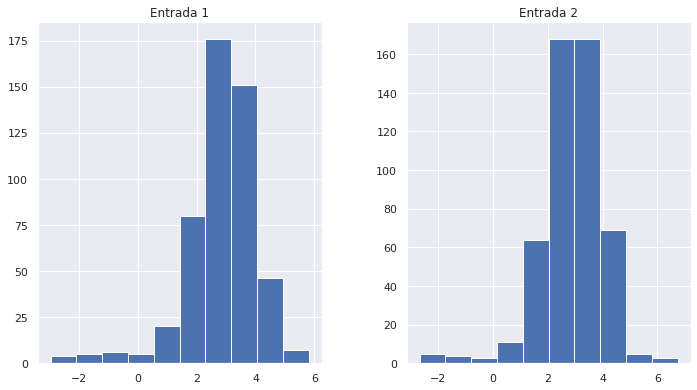

In [ ]:
a = X_test.rename(columns = {0:'Entrada 1', 1:'Entrada 2', 2:'Entrada 3'}, inplace = True)
X_test.hist()
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(11.7, 6.27)
fig.savefig(f'X_test_hist{n_features}.pdf') 

In [ ]:
X_test = pd.DataFrame()
X_train = pd.DataFrame()
y_test = pd.DataFrame()
y_train = pd.DataFrame()
n_features = 5 # Number of features

X_test  = pd.read_csv(f'{n_features}X_test_features_{n_features}.csv')
X_train = pd.read_csv(f'{n_features}X_train_features_{n_features}.csv')
y_test  = pd.read_csv(f'{n_features}y_test_features_{n_features}.csv')

from sklearn.preprocessing import StandardScaler
scaler = preprocessing.MinMaxScaler()
scaler.fit(X_train)    # Only the training data are used to fit the scaler transformation,
X_train_scaled = scaler.transform(X_train) 
X_test_scaled = scaler.transform(X_test)  # then the scaler is used to transform the test input data.
X_train_scaled = pd.DataFrame(X_train_scaled)
X_test_scaled = pd.DataFrame(X_test_scaled)

# X_test_rand = X_test_scaled.iloc[np.random.permutation(X_test_scaled.index)]
# a = pd.merge(X_test_rand, y_test, left_index=True, right_index=True).reset_index(drop=True)
# X_test_rand = a.drop(columns='0')
# X_test_rand.to_csv(f'{n_features}_X_test_scaled{n_features}_PICO.csv', sep=',', index=False, line_terminator=',\n')
# X_test_scaled = X_test_rand
# y_test = a['0'].copy()
# y_test.to_csv(f'{n_features}_y_test_scaled{n_features}_PICO.csv', sep=',', index=False, line_terminator=',\n')

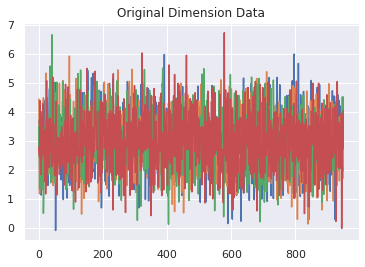

In [ ]:
## https://h1ros.github.io/posts/anomaly-detection-by-auto-encoder-deep-learning-in-pyod/
X_train.iloc[:, :-1].plot(legend=None, title='Original Dimension Data')

# X_test_rand.iloc[:, :-1].plot(legend=None, title='Random Original Dimension Data')

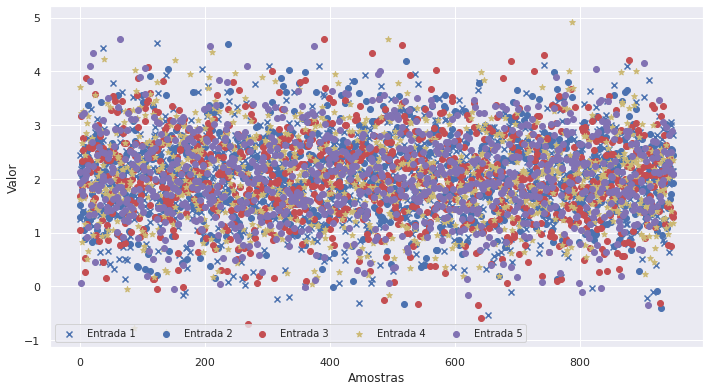

In [ ]:
colors = ['b', 'r', 'y', 'm', 'r']

lo = plt.scatter(X_train.index, X_train.iloc[:,0], marker='x', color=colors[0])
ll = plt.scatter(X_train.index,X_train.iloc[:,1], marker='o', color=colors[0])
l  = plt.scatter(X_train.index, X_train.iloc[:,2], marker='o', color=colors[1])
a  = plt.scatter(X_train.index, X_train.iloc[:,3], marker='*', color=colors[2])
h  = plt.scatter(X_train.index,X_train.iloc[:,4], marker='o', color=colors[3])

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(11.7, 6.27)
plt.xlabel('Amostras') 
plt.ylabel('Valor') 
plt.legend((lo, ll, l, a, h),
           ('Entrada 1', 'Entrada 2', 'Entrada 3', 'Entrada 4', 'Entrada 5'),
           scatterpoints=1,
           loc='lower left',
           ncol=5,
           fontsize=10)

fig.savefig(f'X_train{n_features}.pdf') 

In [ ]:
X_test = X_test.iloc[np.random.permutation(X_test.index)].reset_index(drop=True)
# a = pd.merge(X_test_rand, y_test, left_index=True, right_index=True).reset_index(drop=True)

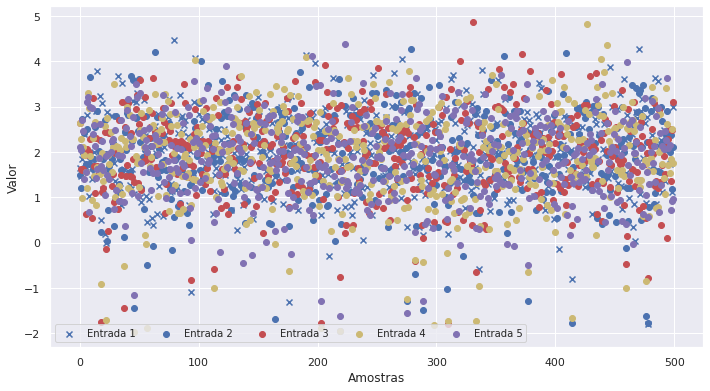

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
lo = plt.scatter(X_test.index, X_test.iloc[:,0], marker='x', color=colors[0])
ll = plt.scatter(X_test.index,X_test.iloc[:,1], marker='o', color=colors[0])
l  = plt.scatter(X_test.index, X_test.iloc[:,2], marker='o', color=colors[1])
a  = plt.scatter(X_test.index, X_test.iloc[:,3], marker='o', color=colors[2])
h  = plt.scatter(X_test.index,X_test.iloc[:,4], marker='o', color=colors[3])
# hh = plt.scatter(X_train.index, X_train.iloc[:,1], marker='o', color=colors[4])


fig = matplotlib.pyplot.gcf()
fig.set_size_inches(11.7, 6.27)
plt.xlabel('Amostras') 
plt.ylabel('Valor') 

plt.legend((lo, ll, l, a, h),
           ('Entrada 1', 'Entrada 2', 'Entrada 3', 'Entrada 4', 'Entrada 5'),
           scatterpoints=1,
           loc='lower left',
           ncol=5,
           fontsize=10 )
fig.savefig(f'X_test{n_features}.pdf') 


In [ ]:
# X_test_rand.to_csv(f'{n_features}_X_test_scaled{n_features}.csv', sep=',', index=False, line_terminator=',\n')


# X_test_scaled=X_test_scaled.iloc[np.random.permutation(X_test_scaled.index)].reset_index(drop=True)

# X_test_scaled = pd.read_csv(f'X_test_scaled{n_features}.csv')
# X_test_scaled

In [ ]:
from tensorflow.random import set_seed 
set_seed(10)

In [ ]:

act_func = 'relu'

# Input layer:
model=Sequential()
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)

# First hidden layer, connected to input vector X. 
model.add(Dense(30,activation=act_func,
                kernel_initializer='glorot_uniform',
                kernel_regularizer=regularizers.l2(0.0),
                input_shape=(X_train.shape[1],)
               )
         )

model.add(Dense(10,activation=act_func,
                kernel_initializer='glorot_uniform'))

model.add(Dense(2,activation=act_func,
                kernel_initializer='glorot_uniform'))

model.add(Dense(10,activation=act_func,
                kernel_initializer='glorot_uniform'))

model.add(Dense(30,activation=act_func,
                kernel_initializer='glorot_uniform'))

model.add(Dense(X_train.shape[1],
                kernel_initializer='glorot_uniform'))

model.compile(loss='mse',optimizer='adam')

# Train model for X epochs, batch size of: 
NUM_EPOCHS=100
BATCH_SIZE=10

In [ ]:
history=model.fit(np.array(X_train_scaled),np.array(X_train_scaled),
                  batch_size=BATCH_SIZE, 
                  epochs=NUM_EPOCHS,
                  validation_split=0.05,
                  verbose = 1,
                  
                  callbacks=[callback])

Epoch 1/100
91/91 [==============================] - 1s 3ms/step - loss: 0.1508 - val_loss: 0.0200
Epoch 2/100
91/91 [==============================] - 0s 2ms/step - loss: 0.0210 - val_loss: 0.0179
Epoch 3/100
91/91 [==============================] - 0s 1ms/step - loss: 0.0184 - val_loss: 0.0139
Epoch 4/100
91/91 [==============================] - 0s 2ms/step - loss: 0.0158 - val_loss: 0.0133
Epoch 5/100
91/91 [==============================] - 0s 2ms/step - loss: 0.0153 - val_loss: 0.0129
Epoch 6/100
91/91 [==============================] - 0s 2ms/step - loss: 0.0149 - val_loss: 0.0127
Epoch 7/100
91/91 [==============================] - 0s 1ms/step - loss: 0.0147 - val_loss: 0.0122
Epoch 8/100
91/91 [==============================] - 0s 2ms/step - loss: 0.0145 - val_loss: 0.0124
Epoch 9/100
91/91 [==============================] - 0s 1ms/step - loss: 0.0144 - val_loss: 0.0124
Epoch 10/100
91/91 [==============================] - 0s 2ms/step - loss: 0.0143 - val_loss: 0.0124
Epoch 11/

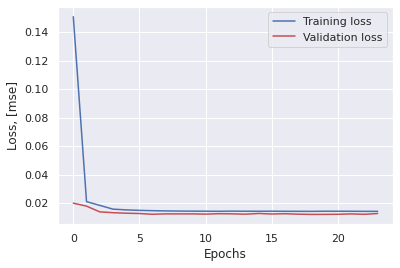

In [ ]:
plt.plot(history.history['loss'],
         'b',
         label='Training loss')
plt.plot(history.history['val_loss'],
         'r',
         label='Validation loss')
plt.legend(loc='upper right')
plt.xlabel('Epochs')
plt.ylabel('Loss, [mse]')
#plt.ylim([0,.1])
plt.show()

In [ ]:
X_pred = model.predict(np.array(X_train_scaled))
X_pred = pd.DataFrame(X_pred, 
                      columns=X_train_scaled.columns)
X_pred.index = X_train_scaled.index

scored = pd.DataFrame(index=X_train_scaled.index)
scored['Loss_mae'] = np.mean(np.abs(X_pred-X_train_scaled), axis = 1)
scored['Loss_mse'] = np.mean(np.power(np.abs(X_pred-X_test_scaled),2), axis = 1)
# plt.figure()
# plt.axvline(x=Threshold,
#             color='red')
# sns.distplot(scored['Loss_mae'],
#              bins = 10, 
#              kde= True,
#             color = 'blue');
# # plt.xlim([0.08,.1])
Threshold = scored['Loss_mae'].mean() + scored['Loss_mae'].std()*3
# # Threshold = scored['Loss_mae'].max()

In [ ]:
scored['Loss_mae'].max()

0.2646769746763117

In [ ]:
scored['Loss_mae'].mean()+scored['Loss_mae'].std()*4

0.25749045497551226

In [ ]:
X_pred = model.predict(np.array(X_test_scaled))
X_pred = pd.DataFrame(X_pred, columns=X_test_scaled.columns)
X_pred.index = X_test_scaled.index

In [ ]:
scored = pd.DataFrame(index=X_test_scaled.index)
scored['Loss_mae'] = np.mean(np.abs(X_pred-X_test_scaled), axis = 1)
scored['Threshold'] = Threshold
scored['Amostras'] = y_test
scored['Anomaly'] = scored['Loss_mae'] > scored['Threshold']
scored

,Loss_mae,Threshold,Amostras,Anomaly
0,0.077164,0.216698,0.0,False
1,0.117713,0.216698,0.0,False
2,0.073792,0.216698,0.0,False
3,0.085518,0.216698,0.0,False
4,0.093989,0.216698,0.0,False
...,...,...,...,...
495,0.260113,0.216698,1.0,True
496,0.286388,0.216698,1.0,True
497,0.268861,0.216698,1.0,True
498,0.180204,0.216698,1.0,False


In [ ]:
scored_1 = scored

In [ ]:
# scored_1.to_csv(f'scored_1_{n_features}.csv', sep=',', index=False, line_terminator=',\n')
scored_1.tail(25)

,Loss_mae,Threshold,Amostras,Anomaly
475,0.103712,0.216698,1.0,False
476,0.179705,0.216698,1.0,False
477,0.256096,0.216698,1.0,True
478,0.218492,0.216698,1.0,True
479,0.136932,0.216698,1.0,False
480,0.155617,0.216698,1.0,False
481,0.113896,0.216698,1.0,False
482,0.121713,0.216698,1.0,False
483,0.138795,0.216698,1.0,False
484,0.223838,0.216698,1.0,True


In [ ]:
scored_1['Anomaly'].value_counts()

False    487
True      13
Name: Anomaly, dtype: int64

In [ ]:
scored_1.loc[scored_1['Anomaly'] == True]

,Loss_mae,Threshold,Amostras,Anomaly
53,0.230598,0.216698,0.0,True
66,0.244064,0.216698,0.0,True
369,0.261852,0.216698,0.0,True
477,0.256096,0.216698,1.0,True
478,0.218492,0.216698,1.0,True
484,0.223838,0.216698,1.0,True
485,0.226207,0.216698,1.0,True
488,0.287700,0.216698,1.0,True
493,0.334977,0.216698,1.0,True
494,0.247006,0.216698,1.0,True


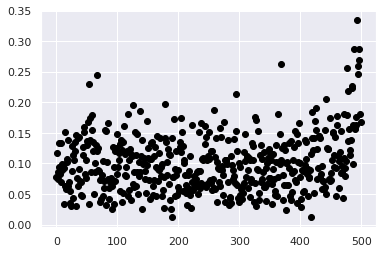

In [ ]:
plt.plot(scored_1.index, scored_1['Loss_mae'], 'o', color='black');

In [ ]:
# name = raw_input("Please enter your name: ")

In [ ]:
#@title
# Define paths to model files

MODELS_DIR = 'models/'

if not os.path.exists(MODELS_DIR):
    os.mkdir(MODELS_DIR)

MODEL_TF = MODELS_DIR + 'model'

# Default
MODEL_NO_QUANT_TFLITE = MODELS_DIR + 'model_no_quant.tflite'
MODEL_NO_QUANT_TFLITE_MICRO = MODELS_DIR + 'model_no_quant.cc'

# Post-training integer quantization
MODEL_PTQ_TFLITE = MODELS_DIR + 'model_qpa.tflite'
MODEL_PTQ_TFLITE_MICRO = MODELS_DIR + 'model_qpa.cc'

# Quantization Aware Training
MODEL_QAT_TFLITE = MODELS_DIR + 'model_qat.tflite'
MODEL_QAT_TFLITE_MICRO = MODELS_DIR + 'model_qat.cc'

# Pruning
MODEL_PRU_TFLITE = MODELS_DIR + 'model_pru.tflite'
MODEL_PRU_TFLITE_MICRO = MODELS_DIR + 'model_pru.cc'

# Weight cluster
MODEL_CLU_TFLITE = MODELS_DIR + 'model_clu.tflite'
MODEL_CLU_TFLITE_MICRO = MODELS_DIR + 'model_clu.cc'


In [ ]:
#@title
# model.save(MODEL_TF)
import tempfile

model.save('test' + '.h5')
model.save(MODEL_TF)
_, keras_file = tempfile.mkstemp('.h5')
tf.keras.models.save_model(model, keras_file, include_optimizer=False)
print('Saved baseline model to:', keras_file)

Saved baseline model to: /tmp/tmp9v9q2ju8.h5


In [ ]:
#@title
# DEFAULT MODEL - CONVERT TO TFLITE

# Convert the model to the TensorFlow Lite format without quantization
converter = tf.lite.TFLiteConverter.from_saved_model(MODEL_TF)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
model_no_quant_tflite = converter.convert()

# Save the model to disk
open(MODEL_NO_QUANT_TFLITE, "wb").write(model_no_quant_tflite)

# Show Model
# tf.keras.utils.plot_model(model, show_shapes=True, show_layer_names=True)

6808

In [ ]:
#@title
xx_train = X_train_scaled.to_numpy()
xx_test = X_test_scaled.to_numpy()

In [ ]:
# #@title
# def representative_dataset():
#   for i in range(950):
#     yield([xx_train[i].astype(np.float32).reshape(1, n_features)])

# converter = tf.lite.TFLiteConverter.from_keras_model(model)
# converter.optimizations = [tf.lite.Optimize.DEFAULT]
# converter.representative_dataset = representative_dataset

# tflite_model_quant = converter.convert()

In [ ]:
size_tf = os.path.getsize(MODEL_TF)
size_no_quant_tflite = os.path.getsize(MODEL_NO_QUANT_TFLITE)

In [ ]:
print(f'TF Model Size = {size_tf} kB')
print(f'TF Lite No Quant Model Size = {size_no_quant_tflite} kB')

# Convert to a C source file, i.e, a TensorFlow Lite for Microcontrollers model
!xxd -i {MODEL_NO_QUANT_TFLITE} > {MODEL_NO_QUANT_TFLITE_MICRO}

# Update variable names
REPLACE_TEXT = MODEL_NO_QUANT_TFLITE.replace('/', '_').replace('.', '_')
!sed -i 's/'{REPLACE_TEXT}'/g_model/g' {MODEL_NO_QUANT_TFLITE_MICRO}

# Update variables - const
!sed -i 's/unsigned char/alignas(8) const unsigned char/g' {MODEL_NO_QUANT_TFLITE_MICRO}
!sed -i 's/unsigned int/const int/g' {MODEL_NO_QUANT_TFLITE_MICRO}


TF Model Size = 4096 kB
TF Lite No Quant Model Size = 6808 kB


In [ ]:
from os.path import join


In [ ]:
# POST-TRAINING INTEGER QUANTIZATION  --> TFLITE & CC

# Convert the model to the TensorFlow Lite format with quantization

converter = tf.lite.TFLiteConverter.from_saved_model(MODEL_TF)

# Enforce integer only quantization
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8]
converter.inference_input_type = tf.int8
converter.inference_output_type = tf.int8

def representative_dataset():
  for i in range(50):
    yield([xx_test[i].astype(np.float32).reshape(1, n_features)])
  
# Provide a representative dataset to ensure we quantize correctly.
converter.representative_dataset = representative_dataset

# Set the optimization flag.
converter.optimizations = [tf.lite.Optimize.DEFAULT]

model_tflite = converter.convert()

# Save the model to disk
open(MODEL_PTQ_TFLITE, "wb").write(model_tflite)

# Convert to a C source file, i.e, a TensorFlow Lite for Microcontrollers model
!xxd -i {MODEL_PTQ_TFLITE} > {MODEL_PTQ_TFLITE_MICRO}

# Update variable names
REPLACE_TEXT = MODEL_PTQ_TFLITE.replace('/', '_').replace('.', '_')
!sed -i 's/'{REPLACE_TEXT}'/g_model/g' {MODEL_PTQ_TFLITE_MICRO}

# Update variables - const
!sed -i 's/unsigned char/alignas(8) const unsigned char/g' {MODEL_PTQ_TFLITE_MICRO}
!sed -i 's/unsigned int/const int/g' {MODEL_PTQ_TFLITE_MICRO}

In [ ]:
size_ptq_tflite = os.path.getsize(MODEL_PTQ_TFLITE)
print(f'TF Lite Post-Training Int Quantization Model Size = {size_ptq_tflite} kB')

TF Lite Post-Training Int Quantization Model Size = 4664 kB


In [ ]:
# ! pip install tensorflow==2.8.0
!pip3 install tensorflow_model_optimization

# Install xxd if it is not available
# !apt-get update && apt-get -qq install xxd
!apt-get -qq install xxd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 238 kB 26.3 MB/s 
Selecting previously unselected package xxd.
(Reading database ... 155685 files and directories currently installed.)
Preparing to unpack .../xxd_2%3a8.0.1453-1ubuntu1.8_amd64.deb ...
Unpacking xxd (2:8.0.1453-1ubuntu1.8) ...
Setting up xxd (2:8.0.1453-1ubuntu1.8) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...


In [ ]:
# QUANTIZATION AWARE TRAINING

import tensorflow_model_optimization as tfmot

quantize_model = tfmot.quantization.keras.quantize_model

# q_aware stands for for quantization aware.
q_aware_model = quantize_model(model)

# `quantize_model` requires a recompile.
q_aware_model.compile(
  loss='mse',
  optimizer='adam'
)


q_aware_model.fit(np.array(X_train_scaled),np.array(X_train_scaled),
    epochs = 20,
    batch_size = BATCH_SIZE,
    validation_split=0.05,
    verbose = 1
)

# model.fit(np.array(X_train),np.array(X_train),
#                   batch_size=BATCH_SIZE, 
#                   epochs=NUM_EPOCHS,
#                   validation_split=0.05,
#                   verbose = 1)

# print('Default Model Accuracy: %.3f' % model.evaluate(X_test, y_test)[1])
# print('Quantization Aware Model Accuracy: %.3f' % q_aware_model.evaluate(X_test, y_test)[1])

Epoch 1/20
91/91 [==============================] - 1s 4ms/step - loss: 0.0138 - val_loss: 0.0126
Epoch 2/20
91/91 [==============================] - 0s 2ms/step - loss: 0.0140 - val_loss: 0.0125
Epoch 3/20
91/91 [==============================] - 0s 2ms/step - loss: 0.0138 - val_loss: 0.0120
Epoch 4/20
91/91 [==============================] - 0s 2ms/step - loss: 0.0136 - val_loss: 0.0121
Epoch 5/20
91/91 [==============================] - 0s 2ms/step - loss: 0.0136 - val_loss: 0.0119
Epoch 6/20
91/91 [==============================] - 0s 3ms/step - loss: 0.0135 - val_loss: 0.0120
Epoch 7/20
91/91 [==============================] - 0s 3ms/step - loss: 0.0134 - val_loss: 0.0120
Epoch 8/20
91/91 [==============================] - 0s 4ms/step - loss: 0.0134 - val_loss: 0.0120
Epoch 9/20
91/91 [==============================] - 0s 4ms/step - loss: 0.0133 - val_loss: 0.0119
Epoch 10/20
91/91 [==============================] - 0s 5ms/step - loss: 0.0132 - val_loss: 0.0118
Epoch 11/20
91/91 [

In [ ]:
# QUANTIZATION AWARE TRAINING --> TFLITE & CC

converter = tf.lite.TFLiteConverter.from_keras_model(q_aware_model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]

quantized_tflite_model = converter.convert()

# Save the model to disk
open(MODEL_QAT_TFLITE, "wb").write(quantized_tflite_model)

# Convert to a C source file, i.e, a TensorFlow Lite for Microcontrollers model
!xxd -i {MODEL_QAT_TFLITE} > {MODEL_QAT_TFLITE_MICRO}

# Update variable names
REPLACE_TEXT = MODEL_QAT_TFLITE.replace('/', '_').replace('.', '_')
!sed -i 's/'{REPLACE_TEXT}'/g_model/g' {MODEL_QAT_TFLITE_MICRO}

# Update variables - const
!sed -i 's/unsigned char/alignas(8) const unsigned char/g' {MODEL_QAT_TFLITE_MICRO}
!sed -i 's/unsigned int/const int/g' {MODEL_QAT_TFLITE_MICRO}

/usr/local/lib/python3.7/dist-packages/tensorflow/lite/python/convert.py:746: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn("Statistics for quantized inputs were expected, but not "


False    473
True      27
Name: Anomaly, dtype: int64

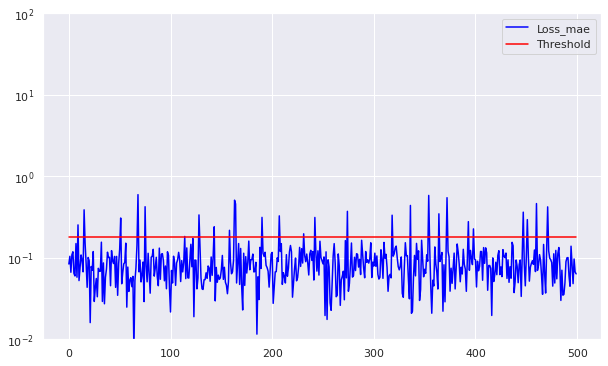

In [ ]:
X_pred_qat = q_aware_model.predict(np.array(X_test_scaled))
X_pred_qat = pd.DataFrame(X_pred_qat, columns=X_test_scaled.columns)
X_pred_qat.index = X_test.index

scored_qat = pd.DataFrame(index=X_test.index)
scored_qat['Loss_mae'] = np.mean(np.abs(X_pred_qat-X_test_scaled), axis = 1)
scored_qat['Threshold'] = Threshold
scored_qat['Anomaly'] = scored_qat['Loss_mae'] > scored_qat['Threshold']
scored_qat['Loss_mae'] = np.mean(np.abs(X_pred_qat-X_test_scaled), axis = 1)
scored_qat.plot(logy= True , figsize = (10,6), ylim = [1e-2,1e2], color = ['blue','red'])
scored_qat['Anomaly'].value_counts()


In [ ]:
scored_qat.loc[scored_qat['Anomaly'] == True]

,Loss_mae,Threshold,Anomaly
9,0.252967,0.179254,True
15,0.387263,0.179254,True
51,0.307368,0.179254,True
68,0.594516,0.179254,True
75,0.422533,0.179254,True
114,0.182513,0.179254,True
128,0.335171,0.179254,True
143,0.239821,0.179254,True
158,0.217167,0.179254,True
163,0.508529,0.179254,True


In [ ]:
# Calculate size
size_tf = os.path.getsize(MODEL_TF)
size_no_quant_tflite = os.path.getsize(MODEL_NO_QUANT_TFLITE)
size_ptq_tflite = os.path.getsize(MODEL_PTQ_TFLITE)
size_qat_tflite = os.path.getsize(MODEL_QAT_TFLITE)

print(f'TF Model Size = {size_tf} kB')
print(f'TF Lite No Quant Model Size = {size_no_quant_tflite} kB')
print(f'TF Lite Post-Training Int Quantization Model Size = {size_ptq_tflite} kB')
print(f'TF Lite Quantization Aware Training Model Size = {size_qat_tflite} kB')

TF Model Size = 4096 kB
TF Lite No Quant Model Size = 6808 kB
TF Lite Post-Training Int Quantization Model Size = 4664 kB
TF Lite Quantization Aware Training Model Size = 5656 kB


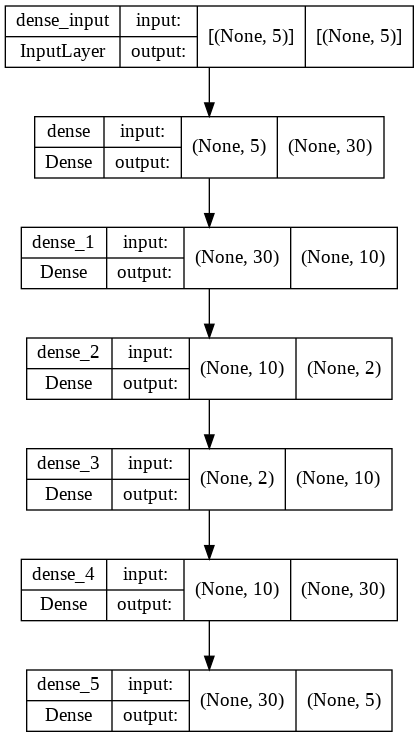

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True, show_layer_names=True)

In [ ]:
import tensorflow_model_optimization as tfmot

prune_low_magnitude = tfmot.sparsity.keras.prune_low_magnitude

# Compute end step to finish pruning after  epochs.
batch_size = 10
epochs = 20
validation_split = 0.05 # 10% of training set will be used for validation set. 

In [ ]:
num_images = X_train_scaled.shape[0] * (1 - validation_split)
end_step = np.ceil(num_images / batch_size).astype(np.int32) * epochs

In [ ]:
# Define model for pruning.
pruning_params = {
      'pruning_schedule': tfmot.sparsity.keras.PolynomialDecay(initial_sparsity=0.10,
                                                               final_sparsity=0.80,
                                                               begin_step=0,
                                                               end_step=end_step)
}

model_for_pruning = prune_low_magnitude(model, **pruning_params)

# `prune_low_magnitude` requires a recompile.
model_for_pruning.compile(optimizer='adam',
              loss='mse',
              metrics=['accuracy'])

model_for_pruning.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 prune_low_magnitude_dense (  (None, 30)               332       
 PruneLowMagnitude)                                              
                                                                 
 prune_low_magnitude_dense_1  (None, 10)               612       
  (PruneLowMagnitude)                                            
                                                                 
 prune_low_magnitude_dense_2  (None, 2)                44        
  (PruneLowMagnitude)                                            
                                                                 
 prune_low_magnitude_dense_3  (None, 10)               52        
  (PruneLowMagnitude)                                            
                                                                 
 prune_low_magnitude_dense_4  (None, 30)               6

In [ ]:
logdir = tempfile.mkdtemp()

callbacks = [
  tfmot.sparsity.keras.UpdatePruningStep(),
  tfmot.sparsity.keras.PruningSummaries(log_dir=logdir),
]

In [ ]:
baseline_model_accuracy = model.evaluate(X_test_scaled, X_test_scaled, verbose=0)

In [ ]:
model_for_pruning.fit(X_train_scaled, X_train_scaled,
                  batch_size=batch_size, epochs=20, validation_split=validation_split,callbacks=callbacks)

Epoch 1/20
 1/91 [..............................] - ETA: 8:07 - loss: 0.0188 - accuracy: 0.2000

91/91 [==============================] - 6s 8ms/step - loss: 0.0132 - accuracy: 0.5399 - val_loss: 0.0115 - val_accuracy: 0.6458
Epoch 2/20
91/91 [==============================] - 0s 4ms/step - loss: 0.0132 - accuracy: 0.5643 - val_loss: 0.0115 - val_accuracy: 0.6458
Epoch 3/20
91/91 [==============================] - 0s 5ms/step - loss: 0.0136 - accuracy: 0.5333 - val_loss: 0.0115 - val_accuracy: 0.6250
Epoch 4/20
91/91 [==============================] - 0s 4ms/step - loss: 0.0136 - accuracy: 0.5288 - val_loss: 0.0116 - val_accuracy: 0.6250
Epoch 5/20
91/91 [==============================] - 1s 6ms/step - loss: 0.0152 - accuracy: 0.4967 - val_loss: 0.0122 - val_accuracy: 0.5833
Epoch 6/20
91/91 [==============================] - 0s 5ms/step - loss: 0.0145 - accuracy: 0.4878 - val_loss: 0.0126 - val_accuracy: 0.6250
Epoch 7/20
91/91 [==============================] - 0s 4ms/step - loss: 0.0166 - accuracy: 0.5155 - val_loss: 0.0133 - val_accuracy: 0.5208
Epoch 8/20
91/91 [=============

In [ ]:
model_for_pruning_accuracy = model_for_pruning.evaluate(X_test_scaled, X_test_scaled, verbose=0)

print('Baseline test accuracy:', baseline_model_accuracy) 
print('Pruned test accuracy:', model_for_pruning_accuracy)

Baseline test accuracy: 0.022196728736162186
Pruned test accuracy: [0.022684983909130096, 0.5220000147819519]


In [ ]:
model_for_export = tfmot.sparsity.keras.strip_pruning(model_for_pruning)

_, pruned_keras_file = tempfile.mkstemp('.h5')
tf.keras.models.save_model(model_for_export, pruned_keras_file, include_optimizer=False)
print('Saved pruned Keras model to:', pruned_keras_file)

Saved pruned Keras model to: /tmp/tmpitsxfzsc.h5


In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model_for_export)
pruned_tflite_model = converter.convert()

_, pruned_tflite_file = tempfile.mkstemp('.tflite')

with open(pruned_tflite_file, 'wb') as f:
  f.write(pruned_tflite_model)

print('Saved pruned TFLite model to:', pruned_tflite_file)

Saved pruned TFLite model to: /tmp/tmpcxa3v4nc.tflite


In [ ]:
def get_gzipped_model_size(file):
  # Returns size of gzipped model, in bytes.
  import os
  import zipfile

  _, zipped_file = tempfile.mkstemp('.zip')
  with zipfile.ZipFile(zipped_file, 'w', compression=zipfile.ZIP_DEFLATED) as f:
    f.write(file)

  return os.path.getsize(zipped_file)

In [ ]:
size_pru_tflite = os.path.getsize(pruned_tflite_file)
print(f'TF Lite Pruning Training Model Size = {size_pru_tflite} kB')

TF Lite Pruning Training Model Size = 6804 kB


In [ ]:
print("Size of gzipped baseline Keras model: %.2f bytes" % (get_gzipped_model_size(keras_file)))
print("Size of gzipped pruned Keras model: %.2f bytes" % (get_gzipped_model_size(pruned_keras_file)))
print("Size of gzipped pruned TFlite model: %.2f bytes" % (get_gzipped_model_size(pruned_tflite_file)))

Size of gzipped baseline Keras model: 6194.00 bytes
Size of gzipped pruned Keras model: 3772.00 bytes
Size of gzipped pruned TFlite model: 2645.00 bytes


In [ ]:
# Create a 10x smaller model from combining pruning and quantization
# You can apply post-training quantization to the pruned model for additional benefits.
converter = tf.lite.TFLiteConverter.from_keras_model(model_for_export)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
quantized_and_pruned_tflite_model = converter.convert()

_, quantized_and_pruned_tflite_file = tempfile.mkstemp('.tflite')

with open(quantized_and_pruned_tflite_file, 'wb') as f:
  f.write(quantized_and_pruned_tflite_model)

print('Saved quantized and pruned TFLite model to:', quantized_and_pruned_tflite_file)

print("Size of gzipped baseline Keras model: %.2f bytes" % (get_gzipped_model_size(keras_file)))
print("Size of gzipped pruned and quantized TFlite model: %.2f bytes" % (get_gzipped_model_size(quantized_and_pruned_tflite_file)))

Saved quantized and pruned TFLite model to: /tmp/tmptlhz58s6.tflite
Size of gzipped baseline Keras model: 6194.00 bytes
Size of gzipped pruned and quantized TFlite model: 2650.00 bytes


In [ ]:
model_for_pruning.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 prune_low_magnitude_dense (  (None, 30)               332       
 PruneLowMagnitude)                                              
                                                                 
 prune_low_magnitude_dense_1  (None, 10)               612       
  (PruneLowMagnitude)                                            
                                                                 
 prune_low_magnitude_dense_2  (None, 2)                44        
  (PruneLowMagnitude)                                            
                                                                 
 prune_low_magnitude_dense_3  (None, 10)               52        
  (PruneLowMagnitude)                                            
                                                                 
 prune_low_magnitude_dense_4  (None, 30)               6

False    475
True      25
Name: Anomaly, dtype: int64

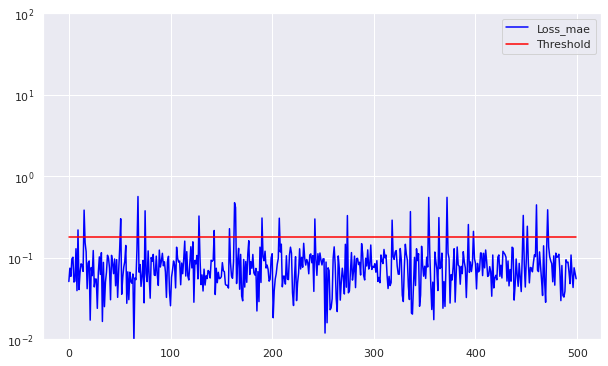

In [ ]:
X_pred_prun = model_for_pruning.predict(np.array(X_test_scaled))
X_pred_prun = pd.DataFrame(X_pred_prun, columns=X_test_scaled.columns)
X_pred_prun.index = X_test.index

scored_prun = pd.DataFrame(index=X_test.index)
scored_prun['Loss_mae'] = np.mean(np.abs(X_pred_prun-X_test_scaled), axis = 1)
scored_prun['Threshold'] = Threshold
scored_prun['Anomaly'] = scored_prun['Loss_mae'] > scored_prun['Threshold']
scored_prun['Loss_mae'] = np.mean(np.abs(X_pred_prun-X_test_scaled), axis = 1)
scored_prun.plot(logy= True , figsize = (10,6), ylim = [1e-2,1e2], color = ['blue','red'])
scored_prun['Anomaly'].value_counts()

In [ ]:
scored_prun.loc[scored_prun['Anomaly'] == True]

,Loss_mae,Threshold,Anomaly
9,0.219430,0.179254,True
15,0.383968,0.179254,True
51,0.301081,0.179254,True
68,0.563935,0.179254,True
75,0.376707,0.179254,True
128,0.325156,0.179254,True
143,0.216026,0.179254,True
158,0.227326,0.179254,True
163,0.473113,0.179254,True
164,0.412904,0.179254,True


### CLuster

In [ ]:
import tensorflow_model_optimization as tfmot

cluster_weights = tfmot.clustering.keras.cluster_weights
CentroidInitialization = tfmot.clustering.keras.CentroidInitialization

clustering_params = {
  'number_of_clusters': 4,
  'cluster_centroids_init': CentroidInitialization.LINEAR
}

# Cluster a whole model
clustered_model = cluster_weights(model, **clustering_params)

# Use smaller learning rate for fine-tuning clustered model
opt = tf.keras.optimizers.Adam(learning_rate=1e-5)

clustered_model.compile(
  loss='mse',
  optimizer='adam')

clustered_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 cluster_dense (ClusterWeigh  (None, 30)               334       
 ts)                                                             
                                                                 
 cluster_dense_1 (ClusterWei  (None, 10)               614       
 ghts)                                                           
                                                                 
 cluster_dense_2 (ClusterWei  (None, 2)                46        
 ghts)                                                           
                                                                 
 cluster_dense_3 (ClusterWei  (None, 10)               54        
 ghts)                                                           
                                                                 
 cluster_dense_4 (ClusterWei  (None, 30)               6

In [ ]:
# Fine-tune model
clustered_model.fit(
  X_train_scaled,
  X_train_scaled,
  batch_size=10,
  epochs=20,
  validation_split=0.05)

Epoch 1/20
91/91 [==============================] - 1s 4ms/step - loss: 0.0563 - val_loss: 0.0203
Epoch 2/20
91/91 [==============================] - 0s 2ms/step - loss: 0.0214 - val_loss: 0.0199
Epoch 3/20
91/91 [==============================] - 0s 2ms/step - loss: 0.0224 - val_loss: 0.0299
Epoch 4/20
91/91 [==============================] - 0s 2ms/step - loss: 0.0211 - val_loss: 0.0208
Epoch 5/20
91/91 [==============================] - 0s 2ms/step - loss: 0.0197 - val_loss: 0.0176
Epoch 6/20
91/91 [==============================] - 0s 2ms/step - loss: 0.0192 - val_loss: 0.0168
Epoch 7/20
91/91 [==============================] - 0s 2ms/step - loss: 0.0185 - val_loss: 0.0165
Epoch 8/20
91/91 [==============================] - 0s 2ms/step - loss: 0.0188 - val_loss: 0.0166
Epoch 9/20
91/91 [==============================] - 0s 2ms/step - loss: 0.0186 - val_loss: 0.0168
Epoch 10/20
91/91 [==============================] - 0s 2ms/step - loss: 0.0185 - val_loss: 0.0167
Epoch 11/20
91/91 [

In [ ]:
final_model = tfmot.clustering.keras.strip_clustering(clustered_model)

_, clustered_keras_file = tempfile.mkstemp('.h5')
print('Saving clustered model to: ', clustered_keras_file)
tf.keras.models.save_model(final_model, clustered_keras_file, 
                           include_optimizer=False)

Saving clustered model to:  /tmp/tmpf_zrjhp3.h5


In [ ]:
clustered_tflite_file = '/tmp/clustered.tflite'
converter = tf.lite.TFLiteConverter.from_keras_model(final_model)
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE ]
tflite_clustered_model = converter.convert()
with open(clustered_tflite_file, 'wb') as f:
  f.write(tflite_clustered_model)
print('Saved clustered TFLite model to:', clustered_tflite_file)

Saved clustered TFLite model to: /tmp/clustered.tflite


In [ ]:
size_clus_tflite = os.path.getsize(clustered_tflite_file)
print(f'TF Lite Pruning Training Model Size = {size_clus_tflite} kB')

TF Lite Pruning Training Model Size = 6764 kB


In [ ]:
def get_gzipped_model_size(file):
  # It returns the size of the gzipped model in bytes.
  import os
  import zipfile

  _, zipped_file = tempfile.mkstemp('.zip')
  with zipfile.ZipFile(zipped_file, 'w', compression=zipfile.ZIP_DEFLATED) as f:
    f.write(file)
    print('Saved clustered TFLite model to:', zipped_file)
  return os.path.getsize(zipped_file)

In [ ]:
print("Size of gzipped baseline Keras model: %.2f bytes" % (get_gzipped_model_size(keras_file)))
print("Size of gzipped clustered Keras model: %.2f bytes" % (get_gzipped_model_size(clustered_keras_file)))
print("Size of gzipped clustered TFlite model: %.2f bytes" % (get_gzipped_model_size(clustered_tflite_file)))

Saved clustered TFLite model to: /tmp/tmpfheyoz_w.zip
Size of gzipped baseline Keras model: 6194.00 bytes
Saved clustered TFLite model to: /tmp/tmpg5g1gt16.zip
Size of gzipped clustered Keras model: 2782.00 bytes
Saved clustered TFLite model to: /tmp/tmpy2_kl12s.zip
Size of gzipped clustered TFlite model: 1989.00 bytes


False    455
True      45
Name: Anomaly, dtype: int64

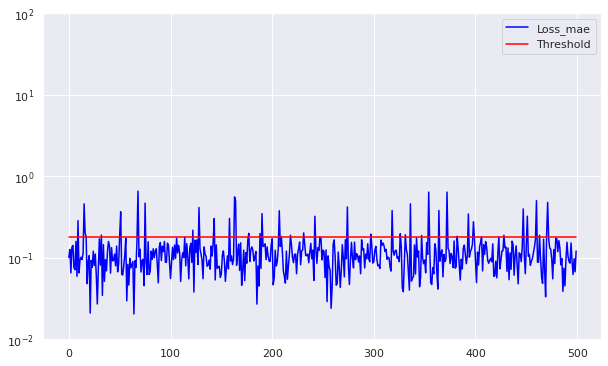

In [ ]:
X_pred_clus = clustered_model.predict(np.array(X_test_scaled))
X_pred_clus = pd.DataFrame(X_pred_clus, columns=X_test_scaled.columns)
X_pred_clus.index = X_test_scaled.index

scored_clus = pd.DataFrame(index=X_test_scaled.index)
scored_clus['Loss_mae'] = np.mean(np.abs(X_pred_clus-X_test_scaled), axis = 1)
scored_clus['Threshold'] = Threshold
scored_clus['Anomaly'] = scored_clus['Loss_mae'] > scored_clus['Threshold']
scored_clus['Loss_mae'] = np.mean(np.abs(X_pred_clus-X_test_scaled), axis = 1)
scored_clus.plot(logy= True , figsize = (10,6), ylim = [1e-2,1e2], color = ['blue','red'])
scored_clus['Anomaly'].value_counts()

In [ ]:
scored_clus.loc[scored_clus['Anomaly'] == True]

,Loss_mae,Threshold,Anomaly
9,0.284957,0.179254,True
15,0.458115,0.179254,True
16,0.200678,0.179254,True
17,0.181783,0.179254,True
32,0.189785,0.179254,True
50,0.188308,0.179254,True
51,0.366558,0.179254,True
68,0.655825,0.179254,True
75,0.468049,0.179254,True
122,0.218109,0.179254,True


In [ ]:
# Calculate size
size_tf = os.path.getsize(MODEL_TF)
size_no_quant_tflite = os.path.getsize(MODEL_NO_QUANT_TFLITE)
size_ptq_tflite = os.path.getsize(MODEL_PTQ_TFLITE)
size_qat_tflite = os.path.getsize(MODEL_QAT_TFLITE)
size_pru_tflite = os.path.getsize(pruned_tflite_file)
size_clus_tflite = os.path.getsize(clustered_tflite_file)
print(f'features = {n_features}')
print(f'TF Model Size = {size_tf} kB')
print(f'TF Lite No Quant Model Size = {size_no_quant_tflite} kB')
print(f'TF Lite Post-Training Int Quantization Model Size = {size_ptq_tflite} kB')
print(f'TF Lite Quantization Aware Training Model Size = {size_qat_tflite} kB')
print(f'TF Lite Pruning Training Model Size = {size_pru_tflite} kB')
print(f'TF Lite Weight Clustering Training Model Size = {size_clus_tflite} kB')

features = 5
TF Model Size = 4096 kB
TF Lite No Quant Model Size = 6808 kB
TF Lite Post-Training Int Quantization Model Size = 4664 kB
TF Lite Quantization Aware Training Model Size = 5656 kB
TF Lite Pruning Training Model Size = 6804 kB
TF Lite Weight Clustering Training Model Size = 6764 kB


In [ ]:
print("Size of gzipped MODEL_TF: %.2f bytes" % (get_gzipped_model_size(MODEL_TF)))
print("Size of gzipped MODEL_NO_QUANT_TFLITE: %.2f bytes" % (get_gzipped_model_size(MODEL_NO_QUANT_TFLITE)))
print("Size of gzipped MODEL_PTQ_TFLITE: %.2f bytes" % (get_gzipped_model_size(MODEL_PTQ_TFLITE)))
print("Size of gzipped MODEL_QAT_TFLITE: %.2f bytes" % (get_gzipped_model_size(MODEL_QAT_TFLITE)))
print("Size of gzipped pruned TFlite model: %.2f bytes" % (get_gzipped_model_size(pruned_tflite_file)))
print("Size of gzipped clustered TFlite model: %.2f bytes" % (get_gzipped_model_size(clustered_tflite_file)))

Saved clustered TFLite model to: /tmp/tmp7rcmdxox.zip
Size of gzipped MODEL_TF: 124.00 bytes
Saved clustered TFLite model to: /tmp/tmpu95_k5ns.zip
Size of gzipped MODEL_NO_QUANT_TFLITE: 5033.00 bytes
Saved clustered TFLite model to: /tmp/tmp13m49hfl.zip
Size of gzipped MODEL_PTQ_TFLITE: 2559.00 bytes
Saved clustered TFLite model to: /tmp/tmpmwvhn9do.zip
Size of gzipped MODEL_QAT_TFLITE: 2767.00 bytes
Saved clustered TFLite model to: /tmp/tmpfafputqn.zip
Size of gzipped pruned TFlite model: 2645.00 bytes
Saved clustered TFLite model to: /tmp/tmph9w1kbtv.zip
Size of gzipped clustered TFlite model: 1989.00 bytes


In [ ]:
# Convert to a C source file, i.e, a TensorFlow Lite for Microcontrollers model
!xxd -i {pruned_tflite_file} > {MODEL_PRU_TFLITE_MICRO}

# Update variable names
REPLACE_TEXT = pruned_tflite_file.replace('/', '_').replace('.', '_')
!sed -i 's/'{REPLACE_TEXT}'/g_model/g' {MODEL_PRU_TFLITE_MICRO}

# Update variables - const
!sed -i 's/unsigned char/alignas(8) const unsigned char/g' {MODEL_PRU_TFLITE_MICRO}
!sed -i 's/unsigned int/const int/g' {MODEL_PRU_TFLITE_MICRO}

In [ ]:
# Convert to a C source file, i.e, a TensorFlow Lite for Microcontrollers model
!xxd -i {clustered_tflite_file} > {MODEL_CLU_TFLITE_MICRO}

# Update variable names
REPLACE_TEXT = clustered_tflite_file.replace('/', '_').replace('.', '_')
!sed -i 's/'{REPLACE_TEXT}'/g_model/g' {MODEL_CLU_TFLITE_MICRO}

# Update variables - const
!sed -i 's/unsigned char/alignas(8) const unsigned char/g' {MODEL_CLU_TFLITE_MICRO}
!sed -i 's/unsigned int/const int/g' {MODEL_CLU_TFLITE_MICRO}

In [ ]:
def print_sparsity(model):
    for w in model.weights:
        n_weights = w.numpy().size
        n_zeros = np.count_nonzero(w == 0)
        sparsity = n_zeros / n_weights * 100.0
        if sparsity > 0:
            print('    {} - {:.1f}% sparsity'.format(w.name, sparsity))

In [ ]:
print('Sparse weights:')
print_sparsity(model_for_pruning)

Sparse weights:
    prune_low_magnitude_dense/mask:0 - 80.0% sparsity
    prune_low_magnitude_dense_1/mask:0 - 80.0% sparsity
    prune_low_magnitude_dense_2/mask:0 - 80.0% sparsity
    prune_low_magnitude_dense_3/mask:0 - 80.0% sparsity
    prune_low_magnitude_dense_4/mask:0 - 80.0% sparsity
    prune_low_magnitude_dense_5/mask:0 - 80.0% sparsity


In [ ]:
def print_clusters(model):
    for w in model.weights:
        n_weights = w.numpy().size
        n_unique = len(np.unique(w))
        if n_unique < n_weights:
            print('    {} - {} unique weights'.format(w.name, n_unique))

In [ ]:
strip_clustering = tfmot.clustering.keras.strip_clustering

In [ ]:
stripped_pruned_clustered_model = strip_clustering(clustered_model)

In [ ]:
print('Sparse weights:')
print_sparsity(model)

Sparse weights:
